In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
pd.pandas.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv("output_data.csv")
df.head()

,SrNo,Date_yyyy_mm_dd,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountinUSD,Remarks
0,1,2020-01-09,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000.0,NaN
1,2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394.0,NaN
2,3,2020-01-09,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860.0,NaN
3,4,2020-01-02,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000.0,NaN
4,5,2020-01-02,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000.0,NaN


In [4]:
df['InvestorsName'] = df['InvestorsName'].fillna('')
df['InvestorsList'] = df['InvestorsName'].str.split(',')
df.head(10)

,SrNo,Date_yyyy_mm_dd,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountinUSD,Remarks,InvestorsList
0,1,2020-01-09,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000.0,NaN,[Tiger Global Management]
1,2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394.0,NaN,[Susquehanna Growth Equity]
2,3,2020-01-09,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860.0,NaN,[Sequoia Capital India]
3,4,2020-01-02,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000.0,NaN,[Vinod Khatumal]
4,5,2020-01-02,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000.0,NaN,[Sprout Venture Partners]
5,6,2020-01-13,Pando,Logistics,"Open-market, freight management platform",Chennai,Chiratae Ventures,Series A,9000000.0,NaN,[Chiratae Ventures]
6,7,2020-01-10,Zomato,Hospitality,Online Food Delivery Platform,Gurgaon,Ant Financial,Private Equity Round,150000000.0,NaN,[Ant Financial]
7,8,2019-12-12,Ecozen,Technology,Agritech,Pune,Sathguru Catalyzer Advisors,Series A,6000000.0,NaN,[Sathguru Catalyzer Advisors]
8,9,2019-12-06,CarDekho,E-Commerce,Automobile,Gurgaon,Ping An Global Voyager Fund,Series D,70000000.0,NaN,[Ping An Global Voyager Fund]
9,10,2019-12-03,Dhruva Space,Aerospace,Satellite Communication,Bengaluru,"Mumbai Angels, Ravikanth Reddy",Seed,50000000.0,NaN,"[Mumbai Angels, Ravikanth Reddy]"


In [5]:
B = nx.Graph()

for _, row in df.iterrows():
    startup = row['StartupName']
    investors = row['InvestorsList']
    for investor in investors:
        investor = investor.strip()
        if investor:
            B.add_node(startup, bipartite='startup')
            B.add_node(investor, bipartite='investor')
            B.add_edge(investor, startup)

#### INVESTOR-INVESTOR NETWORK PROJECTION

<div class = 'alert alert-block alert-success'>
    To go beyond simple counts of investments, we build a **bipartite network** of startups and investors:
<br>Nodes = Investors + Startups  
<br>Edges = An investment relationship (investor → startup)
</div>

In [6]:
from networkx.algorithms import bipartite

investors = [n for n, d in B.nodes(data=True) if d['bipartite'] == 'investor']
G_investor = bipartite.weighted_projected_graph(B, investors)
print(f"Total investors: {len(investors)}")
print(f"Investor network edges: {G_investor.number_of_edges()}")

Total investors: 3272
Investor network edges: 8613


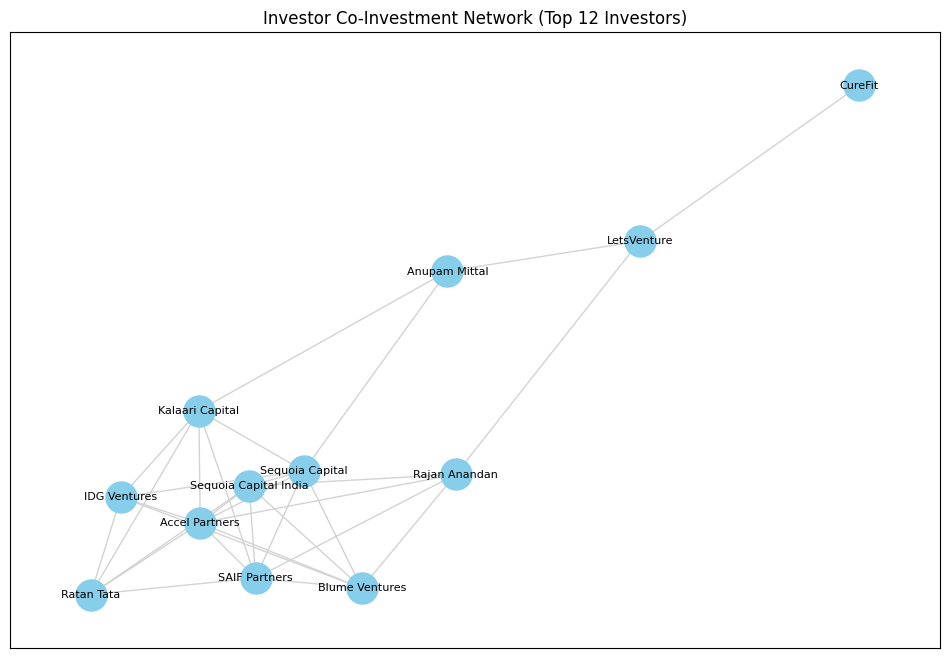

In [7]:
centrality = nx.degree_centrality(G_investor)
top_12_investors = [inv for inv, _ in sorted(centrality.items(), key=lambda x: x[1], reverse=True)[:12]]
subgraph = G_investor.subgraph(top_12_investors)

plt.figure(figsize=(12,8))
pos = nx.spring_layout(subgraph, k=0.3, seed=42)
nx.draw_networkx(
    subgraph, pos,
    with_labels=True,
    node_size=500,
    node_color="skyblue",
    edge_color="lightgray",
    font_size=8
)
plt.title("Investor Co-Investment Network (Top 12 Investors)")
plt.show()

#### INVESTOR CO-INVESTMENT PROJECTION

<div class = 'alert alert-block alert-success'>
    Finds the top 10 strongest co-investment ties. Shows the subgraph of those investors, with edge thickness proportional to co-investment frequency.
</div>

Top 10 co-investor pairs:
Kunal Bahl - Rohit Bansal: 13 co-investments
Sandeep Tandon - Kunal Shah: 11 co-investments
IDG Ventures - Accel Partners: 6 co-investments
Flipkart - Accel Partners: 5 co-investments
Beenext - Beenos: 5 co-investments
Sequoia India - Sequoia Capital: 4 co-investments
Bessemer Venture Partners - SAIF Partners: 4 co-investments
Sachin Bansal - Binny Bansal: 4 co-investments
Tracxn Labs - Kunal Shah: 4 co-investments
Mumbai Angels - LetsVenture: 4 co-investments


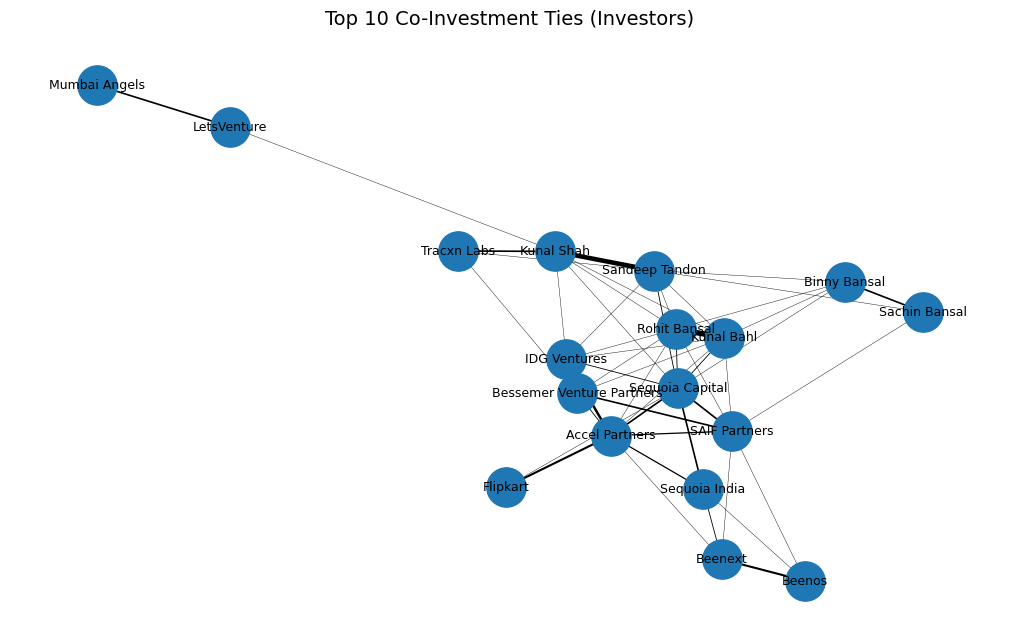

In [8]:
investors = {n for n, d in B.nodes(data=True) if d['bipartite'] == 'investor'}

G_investor = nx.bipartite.weighted_projected_graph(B, investors)

# Top 10 co-investor pairs by weight
top_edges = sorted(G_investor.edges(data=True),
                   key=lambda x: x[2]['weight'],
                   reverse=True)[:10]

print("Top 10 co-investor pairs:")
for u, v, d in top_edges:
    print(f"{u} - {v}: {d['weight']} co-investments")

top_investors = set([u for u, v, _ in top_edges] + [v for u, v, _ in top_edges])

subgraph = G_investor.subgraph(top_investors)

plt.figure(figsize=(10, 6))
pos = nx.spring_layout(subgraph, seed=42)
nx.draw(subgraph, pos,
        with_labels=True,
        node_size=800,
        font_size=9,
        width=[d['weight']*0.3 for (_, _, d) in subgraph.edges(data=True)])
plt.title("Top 10 Co-Investment Ties (Investors)", fontsize=14)
plt.show()

#### STARTUP-INVESTOR DIVERSITY

<div class = 'alert alert-block alert-success'>
    It gives the number of unique investors per startup. That gives a ranking of startups by how many distinct investors participated across all their funding rounds.
</div>

In [9]:
df['InvestorsName'] = df['InvestorsName'].fillna('')
df['InvestorList'] = df['InvestorsName'].apply(lambda x: [i.strip() for i in x.split(',') if i.strip()])

df_exploded = df.explode('InvestorList')

startup_investor_counts = (
    df_exploded.groupby('StartupName')['InvestorList']
    .nunique()
    .reset_index(name='UniqueInvestors')
    .sort_values(by='UniqueInvestors', ascending=False)
)

top_diverse_startups = startup_investor_counts.head(10)
print(top_diverse_startups)

      StartupName  UniqueInvestors
1454     Ola Cabs               14
1268      Medinfi               14
743          Fynd               13
1422     NoBroker               12
884   HealthifyMe               12
2137    UrbanClap               12
1311       Moglix               12
2327      Zilingo               12
1272       Meesho               12
447       CureFit               12
